<h3>
    Assignment
    </h3>

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.
Loading Data and modules

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import classification_report

In [46]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

titanic = pd.read_csv(Url)
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

<b> Given in problem statement </b> <br>
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard),
and Fare to predict whether a passenger survived.

In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b> Name, Sex, Ticket, Cabin, Embarked looks Object or String type

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<b> Age, Cabin and EMbarked seems to be having null values

Since out of 4 columns having null values, only 1 suggested to use in the model. So lets findout why that column is null

In [47]:
suggestedColumns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
# Lets add target variable as well so that drop NAN will result in same shape for both independant and target
suggestedColumns.append('Survived')

In [39]:
titanic.loc[titanic.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [43]:
titanic.loc[titanic.Age.isna()].shape[0]/titanic.shape[0] * 100

19.865319865319865

<b> Wow, 19% values are null. We will have to treat these values because model couldn't take action for these values. NaN are just not comparable with anything

In [48]:
# Not null data
titanicNew = titanic[titanic.Age.isna()==False][suggestedColumns]

In [49]:
titanicNew['New_Sex'] = pd.get_dummies(titanicNew.Sex, drop_first=True)

In [50]:
suggestedColumns.remove('Sex')
suggestedColumns.append('New_Sex')

In [51]:
titanicNew = titanicNew[suggestedColumns]

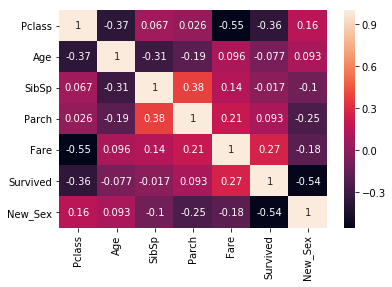

In [53]:
sns.heatmap(titanicNew.corr(), annot=True)

From heatmap, it looks like Survived is not strongl correlated with any variable. Weakly correlated with <b> Sex, Pclass and Fare

<h3> Lets Fit Model </h3>

<b> 1. Split the data

In [54]:
cv = KFold(n_splits=5, random_state=12345)
dtree = DecisionTreeClassifier()

In [55]:
titanicNew.isna().any()

Pclass      False
Age         False
SibSp       False
Parch       False
Fare        False
Survived    False
New_Sex     False
dtype: bool

In [56]:
suggestedColumns.remove('Survived')

<b> 2. Fit model and check accuracy using suggested columns </b>

In [82]:
for train, validate in cv.split(titanicNew[suggestedColumns], titanicNew.Survived):
    #x_train, x_test, y_train, y_test = train_test_split(titanicNew[suggestedColumns].loc[y], titanicNew.loc[y], test_size=0.3, random_state=12345)
    dtree.fit(titanicNew.iloc[train][suggestedColumns], titanicNew.iloc[train].Survived)
    trainScore = dtree.score(titanicNew.iloc[train][suggestedColumns], titanicNew.iloc[train].Survived)    
    testScore = dtree.score(titanicNew.iloc[validate][suggestedColumns], titanicNew.iloc[validate].Survived)
    print("Train score: {} and test score: {}".format(trainScore, testScore))      

Train score: 0.9859894921190894 and test score: 0.7622377622377622
Train score: 0.9947460595446584 and test score: 0.7412587412587412
Train score: 0.989492119089317 and test score: 0.7972027972027972
Train score: 0.9859894921190894 and test score: 0.7552447552447552
Train score: 0.9842657342657343 and test score: 0.8028169014084507


Model seems to be <b> Over fit </b> because R square is very high in the training but very low in testing

Lets also check if <b> precision and recall </b> values are also poor beside <b> R square </b>

In [85]:
for train, validate in cv.split(titanicNew[suggestedColumns], titanicNew.Survived):    
    dtree.fit(titanicNew.iloc[train][suggestedColumns], titanicNew.iloc[train].Survived)
    y_predicted = dtree.predict(titanicNew.iloc[validate][suggestedColumns])
    precis = metrics.precision_score(titanicNew.iloc[validate].Survived, y_predicted)
    recall = metrics.recall_score(titanicNew.iloc[validate].Survived, y_predicted)
    print('precision and recall value of the model are {} and {}'.format(precis, recall))

precision and recall value of the model are 0.5862068965517241 and 0.7555555555555555
precision and recall value of the model are 0.7543859649122807 and 0.6615384615384615
precision and recall value of the model are 0.78125 and 0.78125
precision and recall value of the model are 0.74 and 0.6166666666666667
precision and recall value of the model are 0.71875 and 0.8214285714285714


Although model <b> Over fitted </b> but other <b> performance parameters (Precision and recall) </b> looks good

<b> 3. Lets build model using only significant variable than suggested variables </b>

In [88]:
suggestedColumns.remove('Age')
suggestedColumns.remove('SibSp')
suggestedColumns.remove('Parch')

In [89]:
for train, validate in cv.split(titanicNew[suggestedColumns], titanicNew.Survived):
    #x_train, x_test, y_train, y_test = train_test_split(titanicNew[suggestedColumns].loc[y], titanicNew.loc[y], test_size=0.3, random_state=12345)
    dtree.fit(titanicNew.iloc[train][suggestedColumns], titanicNew.iloc[train].Survived)
    trainScore = dtree.score(titanicNew.iloc[train][suggestedColumns], titanicNew.iloc[train].Survived)    
    testScore = dtree.score(titanicNew.iloc[validate][suggestedColumns], titanicNew.iloc[validate].Survived)
    print("Train score: {} and test score: {}".format(trainScore, testScore))      

Train score: 0.8966725043782837 and test score: 0.7552447552447552
Train score: 0.9176882661996497 and test score: 0.7552447552447552
Train score: 0.9001751313485113 and test score: 0.8461538461538461
Train score: 0.9054290718038529 and test score: 0.7622377622377622
Train score: 0.9055944055944056 and test score: 0.8450704225352113


<b> Now model is more better fitted than previous model so removing unwanted columns avoids maximum learning in a model</b>

<b> We could try dropping Fare or PClass because they are correlated to each other. So it may improve gap in R square between train and test </b>